In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [1]:
%matplotlib inline
import numpy as np
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

In [2]:
# Ejemplos de entrada de la función AND
X = np.array([[0,0], [0,1],[1,0],[1,1]])

#-- Respuesta esperada para cada ejemplo
T = np.array([0,0,0,1])

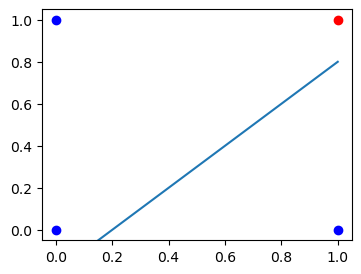

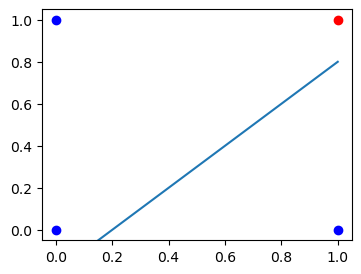

In [3]:
# -- PESOS INICIALES - Determinan la ubicación de la recta
W = np.array([-1.0, 1.0])
b = 0.2

print("W = ", W)
print("b = ", b)

dibuPtosRecta(X,T, W, b)

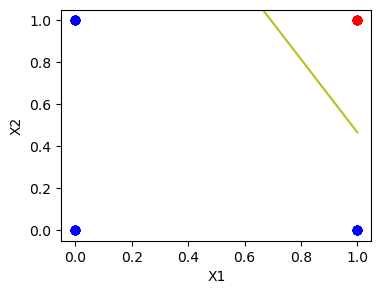

ite 9


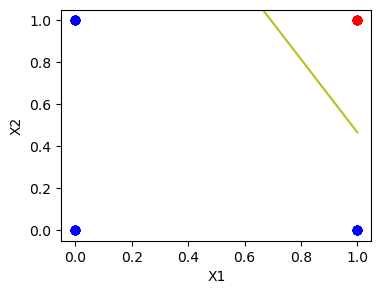

In [4]:
# --- titulos y ph se utilizan sólo para dibujar ---
titulos = ['X1', 'X2']
ph=0

#--- parámetros del PERCEPTRON ---
MAX_ITE = 100
alfa = 0.1

#--- Los pesos iniciales son aleatorios
W = np.array(np.random.uniform(-0.5, 0.5, size=2))
b = np.random.uniform(-0.5, 0.5)

#--- al finalizar ERRORES debe contener la cantidad de cambios realizados en c/iteración ---
errores = []

# --- Entrenamiento del PERCEPTRON ---
nCantEjemplos = X.shape[0]  # nro. de filas
nAtrib = X.shape[1]         #nro. de columnas

ite = 0
N_errores = 1

while (ite < MAX_ITE) and (N_errores>0):
    N_errores = 0
    for e in range(nCantEjemplos):
        # Calcular y  (la salida del perceptron)
        neta = W[0]*X[e,0] + W[1]*X[e,1] + b
        
        y = (neta>0)*1

        # Si no es correcta, corregir  W y b
        if (T[e]!=y):
            N_errores = N_errores + 1
            W[0]= W[0]+ alfa*(T[e]-y)*X[e,0]
            W[1]= W[1]+ alfa*(T[e]-y)*X[e,1]
            b= b + alfa*(T[e]-y)
    
    errores.append(N_errores)
    # graficar la recta
    ph = dibuPtosRecta(X,T, W, b, titulos, ph)
      
    ite = ite + 1
    print("ite %d" % ite)

In [5]:
print("W = ", W)
print("b = ", b)

W =  [0.1739122  0.09986802]
b =  -0.22046741661174935


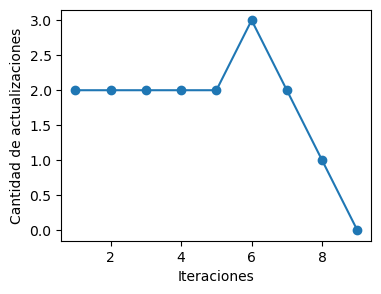

In [6]:
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()